# Решение антагонистической матричной игры

In [26]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
%matplotlib inline
def nash_equilibrium(mas):
    n, m = np.shape(mas)
    t_mas = np.array(mas).T
    is_neg = 0
    p = [0]*n
    q = [0]*m
    min1 = np.empty(n)
    max2 = np.empty(m)
    for i in range (n):        #maxmin
        min1[i] = np.min(mas[i])
    max1 = np.max(min1)
    max1_xy = np.where(mas==max1)
    for i in range (m):           
        max2[i] = np.max(t_mas[i])
    min2 = np.min(max2)
    min2_xy = np.where(mas==min2)
    if (max1==min2):  # Равновесие Нэша
        v = max1
        for i in range (len(max1_xy[0])):
            for j in range (len(min2_xy[0])):
                if (max1_xy[0][i]==min2_xy[0][j]) and (max1_xy[1][i]==min2_xy[1][j]):
                    xy = np.array([max1_xy[0][i],max1_xy[1][i]])
        p[xy[0]] = 1
        q[xy[1]] = 1
        return v,p,q
    # смешанные стратегии    
    min_mas = np.amin(mas)
    if (min_mas<0):
        mas += abs(min_mas)
        is_neg=1
    c = [1]*n
    b = [-1]*m
    result = linprog(c, -np.array(mas).T, b)
    v = 1/np.sum(result.x)
    p = v * result.x
    c = [-1]*m
    b = [1]*n
    q = v * linprog(c, mas, b).x
    if(is_neg):
        return v+min_mas,p,q
    return v,p,q
def draw(p,q):
    plt.xlim([0, len(p)+1])
    plt.ylim([0, np.max(p)+1])
    for i in range(len(p)):
        plt.plot([i+1, i+1], [0, p[i]])
        plt.scatter(i+1, p[i])
    plt.show()

    plt.xlim([0, len(q)+1])
    plt.ylim([0, np.max(q)+1])    
    for i in range(len(q)):
        plt.plot([i+1, i+1], [0, q[i]])
        plt.scatter(i+1, q[i])
    plt.show()

# 1. Cпектр оптимальной стратегии состоит из одной точки

решение игры: 0.0
оптимальная стратегия 1 игрока [ 0.5  0.5]
оптимальная стратегия 2 игрока [ 0.5  0.5]


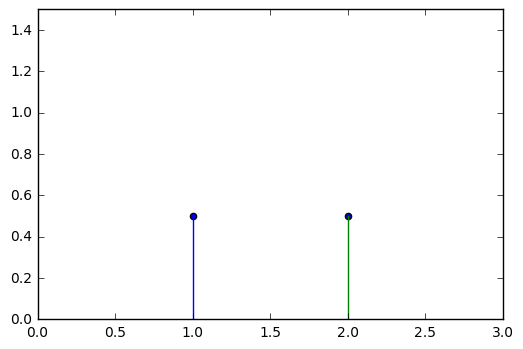

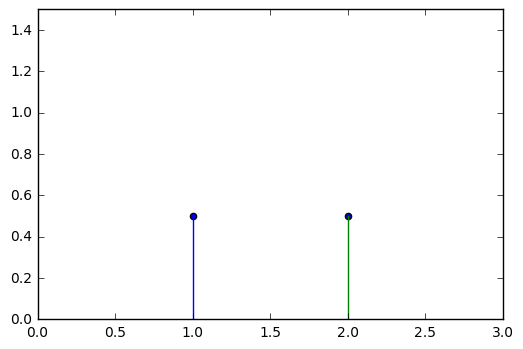

In [27]:
main_mas = np.array([[-1, 1],
                     [1, -1]])
v,p,q = nash_equilibrium(main_mas)
print ('решение игры:', v)
print ('оптимальная стратегия 1 игрока', p)
print ('оптимальная стратегия 2 игрока', q)
draw(p,q)

# 2. Cпектр оптимальной стратегии неполон

решение игры: 4.625
оптимальная стратегия 1 игрока [ 0.3125  0.25    0.      0.4375]
оптимальная стратегия 2 игрока [ 0.125   0.1875  0.6875]


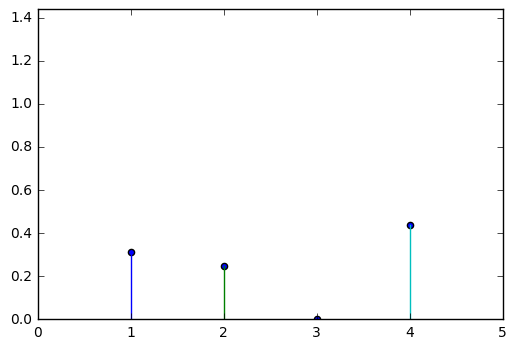

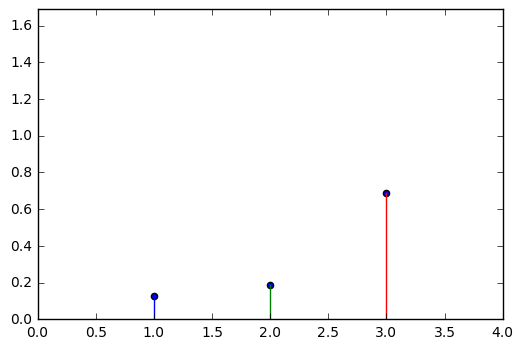

In [33]:
main_mas = np.array([[4, 0, 6],
                     [3, 8, 4],
                     [1, 2, 6],
                     [6, 6, 4]])
v,p,q = nash_equilibrium(main_mas)
print ('решение игры:', v)
print ('оптимальная стратегия 1 игрока', p)
print ('оптимальная стратегия 2 игрока', q)
draw(p,q)

# 3. Cпектр оптимальной стратегии полон

решение игры: 2.5
оптимальная стратегия 1 игрока [ 0.25  0.25  0.5 ]
оптимальная стратегия 2 игрока [ 0.25  0.5   0.25]


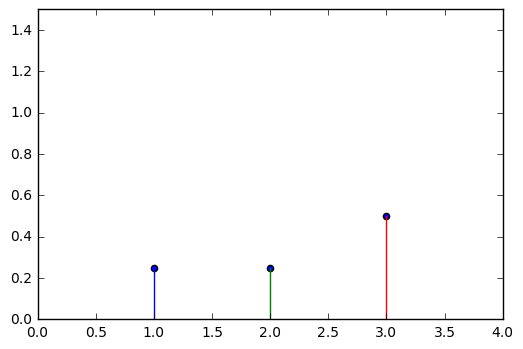

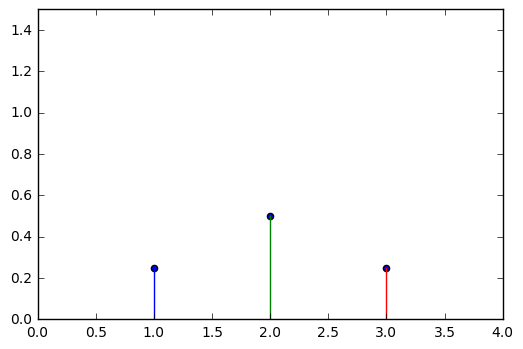

In [34]:
main_mas = np.array([[3, 1, 5],
                     [1, 3, 3],
                     [3, 3, 1]])
v,p,q = nash_equilibrium(main_mas)
print ('решение игры:', v)
print ('оптимальная стратегия 1 игрока', p)
print ('оптимальная стратегия 2 игрока', q)
draw(p,q)

In [ ]:
main_mas = np.array([[-1, 1],
                     [10, -, 5]])
v,p,q = nash_equilibrium(main_mas)
print ('решение игры:', v)
print ('оптимальная стратегия 1 игрока', p)
print ('оптимальная стратегия 2 игрока', q)
draw(p,q)

решение игры: -3.0
оптимальная стратегия 1 игрока [0, 1]
оптимальная стратегия 2 игрока [0, 0, 1]


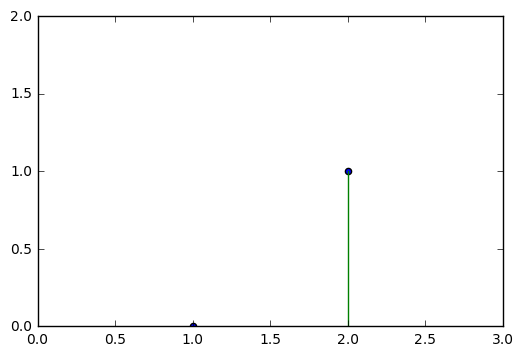

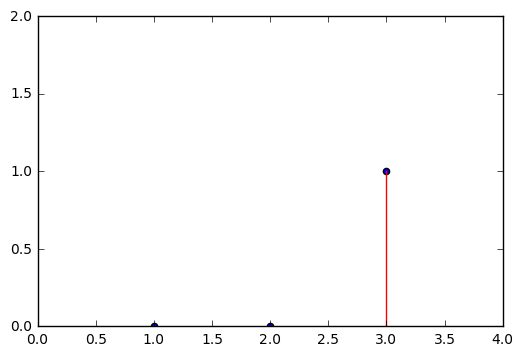

In [32]:
main_mas = np.array([[0, -3, -3],
                     [-3, -3, -3]])
v,p,q = nash_equilibrium(main_mas)
print ('решение игры:', v)
print ('оптимальная стратегия 1 игрока', p)
print ('оптимальная стратегия 2 игрока', q)
draw(p,q)